<a href="https://colab.research.google.com/github/vi-sha-kha/Hotel_Booking_Cancellation_Analysis/blob/main/Aircraft_Data_Analysis_using_SQL_and_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing libraries

In [60]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Database Connection

In [15]:
conn=sqlite3.connect('/content/travel.sqlite')
cursor=conn.cursor()

In [16]:
cursor.execute("""
select name from sqlite_master where type='table'
""")

In [17]:
print('List of tables present in the database')
table_list=[table[0] for table in cursor.fetchall()]

List of tables present in the database


In [18]:
table_list

['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

#Data Exploration

In [19]:
aircrafts_data=pd.read_sql_query("select * from aircrafts_data", conn)
aircrafts_data

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
6,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
7,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
8,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700


In [20]:
aircrafts_data.shape

(9, 3)

In [21]:
airports_data=pd.read_sql_query("select * from airports_data", conn)
airports_data.head()

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin


In [22]:
airports_data.shape

(104, 5)

In [23]:
boarding_passes=pd.read_sql_query("select * from boarding_passes", conn)
boarding_passes

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A
...,...,...,...,...
579681,0005434302871,19945,85,20F
579682,0005432892791,19945,86,21C
579683,0005434302869,19945,87,20E
579684,0005432802476,19945,88,21F


In [24]:
bookings=pd.read_sql_query("select * from bookings", conn)
bookings

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600
...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03,56000
262784,FFFF2C,2017-08-08 05:55:00+03,10800
262785,FFFF43,2017-07-20 20:42:00+03,78500
262786,FFFFA8,2017-08-08 04:45:00+03,28800


In [25]:
flights=pd.read_sql_query("select * from flights",conn)
flights

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N
...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03
33117,33118,PG0063,2017-07-28 19:25:00+03,2017-07-28 20:10:00+03,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03,2017-07-28 20:15:00+03
33118,33119,PG0063,2017-09-08 19:25:00+03,2017-09-08 20:10:00+03,SKX,SVO,Scheduled,CR2,\N,\N
33119,33120,PG0063,2017-08-01 19:25:00+03,2017-08-01 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00+03,2017-08-01 20:12:00+03


In [26]:
seats=pd.read_sql_query("select * from seats",conn)
seats

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


In [27]:
ticket_flights=pd.read_sql_query("select * from ticket_flights",conn)
ticket_flights

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100
...,...,...,...,...
1045721,0005435097522,32094,Economy,5200
1045722,0005435097521,32094,Economy,5200
1045723,0005435104384,32094,Economy,5200
1045724,0005435104352,32094,Economy,5200


In [28]:
tickets=pd.read_sql_query("select * from tickets",conn)
tickets

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589
...,...,...,...
366728,0005435999869,D730BA,0474 690760
366729,0005435999870,D730BA,6535 751108
366730,0005435999871,A1AD46,1596 156448
366731,0005435999872,7B6A53,9374 822707


In [29]:
for table in table_list:
  column_info=conn.execute("PRAGMA table_info({})".format(table))
  for column in column_info.fetchall():
    print(column)

(0, 'aircraft_code', 'character(3)', 1, None, 0)
(1, 'model', 'jsonb', 1, None, 0)
(2, 'range', 'INTEGER', 1, None, 0)
(0, 'airport_code', 'character(3)', 1, None, 0)
(1, 'airport_name', 'jsonb', 1, None, 0)
(2, 'city', 'jsonb', 1, None, 0)
(3, 'coordinates', 'point', 1, None, 0)
(4, 'timezone', 'TEXT', 1, None, 0)
(0, 'ticket_no', 'character(13)', 1, None, 0)
(1, 'flight_id', 'INTEGER', 1, None, 0)
(2, 'boarding_no', 'INTEGER', 1, None, 0)
(3, 'seat_no', 'character varying(4)', 1, None, 0)
(0, 'book_ref', 'character(6)', 1, None, 0)
(1, 'book_date', 'timestamp with time zone', 1, None, 0)
(2, 'total_amount', 'numeric(10,2)', 1, None, 0)
(0, 'flight_id', 'INTEGER', 1, None, 0)
(1, 'flight_no', 'character(6)', 1, None, 0)
(2, 'scheduled_departure', 'timestamp with time zone', 1, None, 0)
(3, 'scheduled_arrival', 'timestamp with time zone', 1, None, 0)
(4, 'departure_airport', 'character(3)', 1, None, 0)
(5, 'arrival_airport', 'character(3)', 1, None, 0)
(6, 'status', 'character varying(

In [30]:
for table in table_list:
  print('\ntable:', table)
  column_info=conn.execute("PRAGMA table_info({})".format(table))
  for column in column_info.fetchall():
    print(column[1:3])


table: aircrafts_data
('aircraft_code', 'character(3)')
('model', 'jsonb')
('range', 'INTEGER')

table: airports_data
('airport_code', 'character(3)')
('airport_name', 'jsonb')
('city', 'jsonb')
('coordinates', 'point')
('timezone', 'TEXT')

table: boarding_passes
('ticket_no', 'character(13)')
('flight_id', 'INTEGER')
('boarding_no', 'INTEGER')
('seat_no', 'character varying(4)')

table: bookings
('book_ref', 'character(6)')
('book_date', 'timestamp with time zone')
('total_amount', 'numeric(10,2)')

table: flights
('flight_id', 'INTEGER')
('flight_no', 'character(6)')
('scheduled_departure', 'timestamp with time zone')
('scheduled_arrival', 'timestamp with time zone')
('departure_airport', 'character(3)')
('arrival_airport', 'character(3)')
('status', 'character varying(20)')
('aircraft_code', 'character(3)')
('actual_departure', 'timestamp with time zone')
('actual_arrival', 'timestamp with time zone')

table: seats
('aircraft_code', 'character(3)')
('seat_no', 'character varying(4

In [31]:
for table in table_list:
  print('\n table_name', table)
  df_table=pd.read_sql_query(f"select * from {table}",conn)
  print(df_table)


 table_name aircrafts_data
  aircraft_code                                              model  range
0           773    {"en": "Boeing 777-300", "ru": "Боинг 777-300"}  11100
1           763    {"en": "Boeing 767-300", "ru": "Боинг 767-300"}   7900
2           SU9  {"en": "Sukhoi Superjet-100", "ru": "Сухой Суп...   3000
3           320  {"en": "Airbus A320-200", "ru": "Аэробус A320-...   5700
4           321  {"en": "Airbus A321-200", "ru": "Аэробус A321-...   5600
5           319  {"en": "Airbus A319-100", "ru": "Аэробус A319-...   6700
6           733    {"en": "Boeing 737-300", "ru": "Боинг 737-300"}   4200
7           CN1  {"en": "Cessna 208 Caravan", "ru": "Сессна 208...   1200
8           CR2  {"en": "Bombardier CRJ-200", "ru": "Бомбардье ...   2700

 table_name airports_data
    airport_code                                       airport_name  \
0            YKS          {"en": "Yakutsk Airport", "ru": "Якутск"}   
1            MJZ            {"en": "Mirny Airport", "ru": "Мирн

In [32]:
for table in table_list:
  print('\n table_name', table)
  df_table=pd.read_sql_query(f"select * from {table}",conn)
  print(df_table.isnull().sum())


 table_name aircrafts_data
aircraft_code    0
model            0
range            0
dtype: int64

 table_name airports_data
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

 table_name boarding_passes
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

 table_name bookings
book_ref        0
book_date       0
total_amount    0
dtype: int64

 table_name flights
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

 table_name seats
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

 table_name ticket_flights
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64

 table_name tickets
ticket_no       0
book_ref        0
passenger_id

#Basic Analysis

How many planes have more than 100 seats?


In [33]:
pd.read_sql_query("""select aircraft_code, count(*) as num_seats
from seats
group by aircraft_code HAVING num_seats>100""", conn)

,aircraft_code,num_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402


How did the number of tickets booked and the total amount earned changes with time?

In [36]:
tickets=pd.read_sql_query("""select * from tickets inner join bookings
on tickets.book_ref=bookings.book_ref""", conn)
tickets.dtypes

,0
ticket_no,object
book_ref,object
passenger_id,object
book_ref,object
book_date,object
total_amount,int64


In [38]:
tickets['book_date']=pd.to_datetime(tickets['book_date'])
tickets.dtypes

,0
ticket_no,object
book_ref,object
passenger_id,object
book_ref,object
book_date,"datetime64[ns, UTC+03:00]"
total_amount,int64


In [42]:
tickets['date']=tickets['book_date'].dt.date
tickets

,ticket_no,book_ref,passenger_id,book_ref,book_date,total_amount,date
0,0005432000987,06B046,8149 604011,06B046,2017-07-05 20:19:00+03:00,12400,2017-07-05
1,0005432000988,06B046,8499 420203,06B046,2017-07-05 20:19:00+03:00,12400,2017-07-05
2,0005432000989,E170C3,1011 752484,E170C3,2017-06-29 01:55:00+03:00,24700,2017-06-29
3,0005432000990,E170C3,4849 400049,E170C3,2017-06-29 01:55:00+03:00,24700,2017-06-29
4,0005432000991,F313DD,6615 976589,F313DD,2017-07-03 04:37:00+03:00,30900,2017-07-03
...,...,...,...,...,...,...,...
366728,0005435999869,D730BA,0474 690760,D730BA,2017-08-14 11:50:00+03:00,210600,2017-08-14
366729,0005435999870,D730BA,6535 751108,D730BA,2017-08-14 11:50:00+03:00,210600,2017-08-14
366730,0005435999871,A1AD46,1596 156448,A1AD46,2017-08-13 03:49:00+03:00,45900,2017-08-13
366731,0005435999872,7B6A53,9374 822707,7B6A53,2017-08-15 15:54:00+03:00,219400,2017-08-15


In [43]:
tickets.groupby('date')[['date']].count()

,date
date,
2017-06-21,6
2017-06-22,12
2017-06-23,28
2017-06-24,106
2017-06-25,266
2017-06-26,499
2017-06-27,1028
2017-06-28,1678
2017-06-29,2765


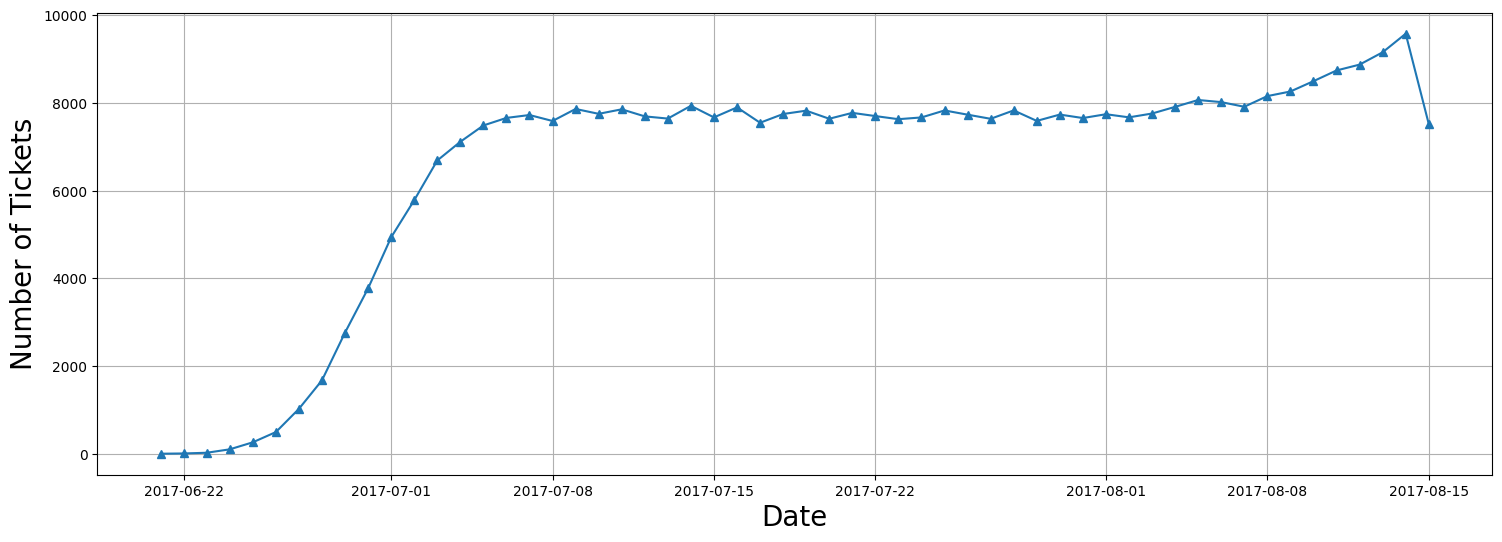

In [45]:
x=tickets.groupby('date')[['date']].count()
plt.figure(figsize=(18,6))
plt.plot(x.index, x['date'], marker='^')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Number of Tickets', fontsize=20)
plt.grid('b')
plt.show()

In [47]:
bookings=pd.read_sql_query("""select * from bookings""",conn)
bookings

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600
...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03,56000
262784,FFFF2C,2017-08-08 05:55:00+03,10800
262785,FFFF43,2017-07-20 20:42:00+03,78500
262786,FFFFA8,2017-08-08 04:45:00+03,28800


In [48]:
bookings.dtypes

,0
book_ref,object
book_date,object
total_amount,int64


In [49]:
bookings['book_date']=pd.to_datetime(bookings['book_date'])
bookings['date']=bookings['book_date'].dt.date

In [50]:
bookings

,book_ref,book_date,total_amount,date
0,00000F,2017-07-05 03:12:00+03:00,265700,2017-07-05
1,000012,2017-07-14 09:02:00+03:00,37900,2017-07-14
2,000068,2017-08-15 14:27:00+03:00,18100,2017-08-15
3,000181,2017-08-10 13:28:00+03:00,131800,2017-08-10
4,0002D8,2017-08-07 21:40:00+03:00,23600,2017-08-07
...,...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03:00,56000,2017-07-17
262784,FFFF2C,2017-08-08 05:55:00+03:00,10800,2017-08-08
262785,FFFF43,2017-07-20 20:42:00+03:00,78500,2017-07-20
262786,FFFFA8,2017-08-08 04:45:00+03:00,28800,2017-08-08


In [51]:
bookings.groupby('date')[['total_amount']].sum()

,total_amount
date,
2017-06-21,441900
2017-06-22,775300
2017-06-23,1822000
2017-06-24,5977000
2017-06-25,15305400
2017-06-26,29049100
2017-06-27,54339900
2017-06-28,91256400
2017-06-29,152484000


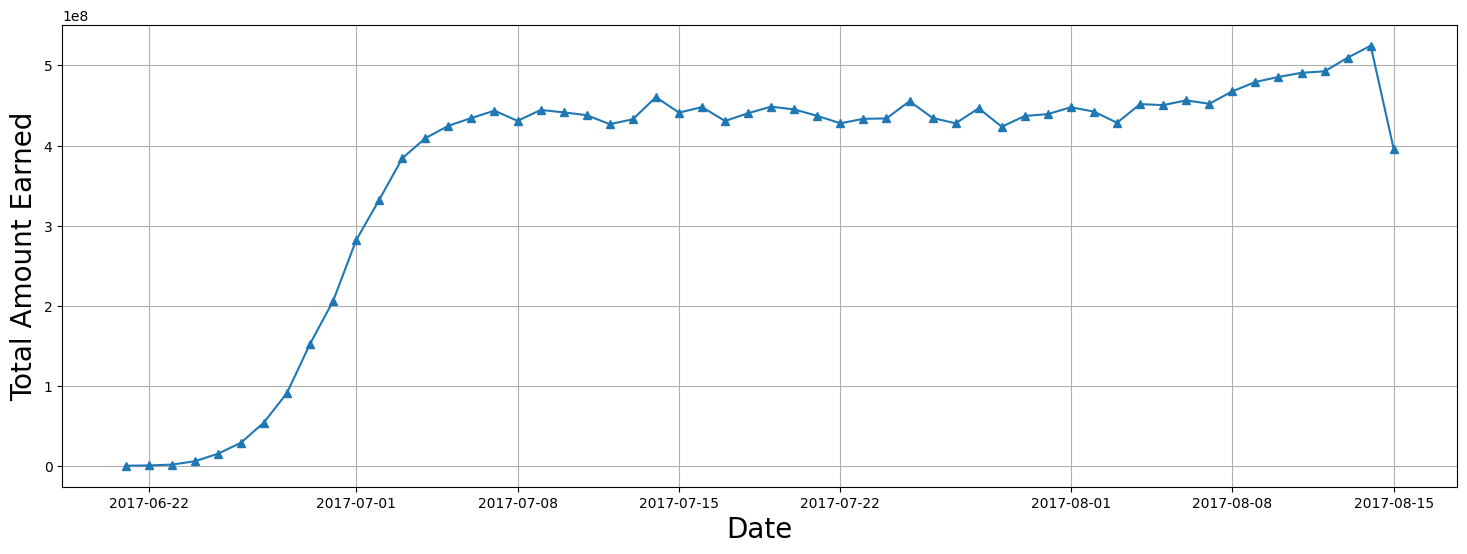

In [52]:
x=bookings.groupby('date')[['total_amount']].sum()
plt.figure(figsize=(18,6))
plt.plot(x.index, x['total_amount'], marker='^')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Total Amount Earned', fontsize=20)
plt.grid('b')
plt.show()

#Calculate the average charges for each aircraft with different fare conditions

In [58]:
df=pd.read_sql_query("""select fare_conditions,aircraft_code,avg(amount) from ticket_flights join flights
on ticket_flights.flight_id=flights.flight_id
group by aircraft_code, fare_conditions""",conn)

In [59]:
df

,fare_conditions,aircraft_code,avg(amount)
0,Business,319,113550.557703
1,Economy,319,38311.402347
2,Business,321,34435.662664
3,Economy,321,11534.974764
4,Business,733,41865.626175
5,Economy,733,13985.152000
6,Business,763,82839.842866
7,Economy,763,27594.721829
8,Business,773,57779.909435
9,Comfort,773,32740.552889


<Axes: xlabel='aircraft_code', ylabel='avg(amount)'>

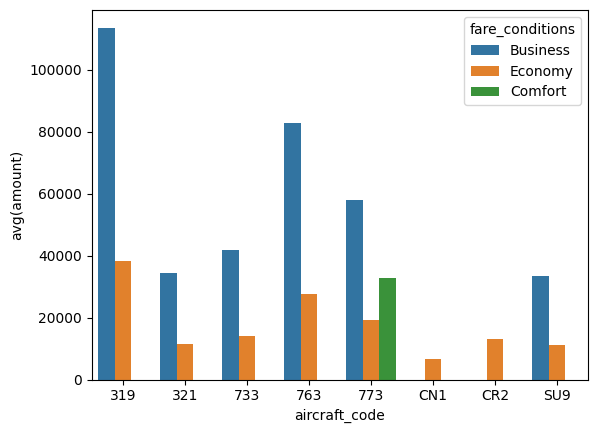

In [61]:
sns.barplot(data=df, x='aircraft_code', y='avg(amount)', hue='fare_conditions')

#Analyzing Occupancy Rate

For each aircraft, calculate the total revenue per year and the average revenue per ticket.

In [62]:
pd.read_sql_query("""select aircraft_code,count(*) as ticket_count, sum(amount) as total_revenue
from ticket_flights join flights on ticket_flights.flight_id=flights.flight_id
group by aircraft_code""",conn)

,aircraft_code,ticket_count,total_revenue
0,319,52853,2706163100
1,321,107129,1638164100
2,733,86102,1426552100
3,763,124774,4371277100
4,773,144376,3431205500
5,CN1,14672,96373800
6,CR2,150122,1982760500
7,SU9,365698,5114484700


In [68]:
pd.read_sql_query("""select aircraft_code, ticket_count, total_revenue, (total_revenue/ticket_count)  Average_revenue_per_ticket
FROM (select aircraft_code,count(*) as ticket_count, sum(amount) as total_revenue
from ticket_flights join flights on ticket_flights.flight_id=flights.flight_id
group by aircraft_code)""",conn)

,aircraft_code,ticket_count,total_revenue,Average_revenue_per_ticket
0,319,52853,2706163100,51201
1,321,107129,1638164100,15291
2,733,86102,1426552100,16568
3,763,124774,4371277100,35033
4,773,144376,3431205500,23765
5,CN1,14672,96373800,6568
6,CR2,150122,1982760500,13207
7,SU9,365698,5114484700,13985


#Calculate the average occupacy per aircraft

In [69]:
pd.read_sql_query("""select aircraft_code,flights.flight_id, count(*) as seats_count
from boarding_passes inner join flights
on boarding_passes.flight_id=flights.flight_id
group by aircraft_code, flights.flight_id""",conn)

,aircraft_code,flight_id,seats_count
0,319,1162,51
1,319,1166,54
2,319,1167,57
3,319,1168,60
4,319,1170,58
...,...,...,...
11513,SU9,32925,12
11514,SU9,32928,25
11515,SU9,32931,12
11516,SU9,32933,16


In [70]:
pd.read_sql_query("""select aircraft_code,count(*) as num_seats from seats group by aircraft_code""",conn)

,aircraft_code,num_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402
6,CN1,12
7,CR2,50
8,SU9,97


In [75]:
pd.read_sql_query("""select a.aircraft_code, avg(a.seats_count) as avg_booked_seats,
b.num_seats, avg(a.seats_count)/b.num_seats as occupancy_rate
FROM
(select aircraft_code,flights.flight_id, count(*) as seats_count
from boarding_passes inner join flights
on boarding_passes.flight_id=flights.flight_id
group by aircraft_code, flights.flight_id) as a
inner join
(select aircraft_code,count(*) as num_seats from seats group by aircraft_code) as b
ON a.aircraft_code=b.aircraft_code
group by a.aircraft_code""",conn)

,aircraft_code,avg_booked_seats,num_seats,occupancy_rate
0,319,53.583181,116,0.461924
1,321,88.809231,170,0.522407
2,733,80.255462,130,0.617350
3,763,113.937294,222,0.513231
4,773,264.925806,402,0.659019
5,CN1,6.004431,12,0.500369
6,CR2,21.482847,50,0.429657
7,SU9,56.812113,97,0.585692


Calculate by how much the total turnover could increase by giving all aircraft a 10% higher occupancy rate.

In [76]:
occupancy_rate=pd.read_sql_query("""select a.aircraft_code, avg(a.seats_count) as avg_booked_seats,
b.num_seats, avg(a.seats_count)/b.num_seats as occupancy_rate
FROM
(select aircraft_code,flights.flight_id, count(*) as seats_count
from boarding_passes inner join flights
on boarding_passes.flight_id=flights.flight_id
group by aircraft_code, flights.flight_id) as a
inner join
(select aircraft_code,count(*) as num_seats from seats group by aircraft_code) as b
ON a.aircraft_code=b.aircraft_code
group by a.aircraft_code""",conn)
occupancy_rate

,aircraft_code,avg_booked_seats,num_seats,occupancy_rate
0,319,53.583181,116,0.461924
1,321,88.809231,170,0.522407
2,733,80.255462,130,0.617350
3,763,113.937294,222,0.513231
4,773,264.925806,402,0.659019
5,CN1,6.004431,12,0.500369
6,CR2,21.482847,50,0.429657
7,SU9,56.812113,97,0.585692


In [77]:
occupancy_rate['Inc_occupancy_rate']=occupancy_rate['occupancy_rate']+occupancy_rate['occupancy_rate']*0.1
occupancy_rate

,aircraft_code,avg_booked_seats,num_seats,occupancy_rate,Inc_occupancy_rate
0,319,53.583181,116,0.461924,0.508116
1,321,88.809231,170,0.522407,0.574648
2,733,80.255462,130,0.617350,0.679085
3,763,113.937294,222,0.513231,0.564554
4,773,264.925806,402,0.659019,0.724921
5,CN1,6.004431,12,0.500369,0.550406
6,CR2,21.482847,50,0.429657,0.472623
7,SU9,56.812113,97,0.585692,0.644261


In [78]:
total_revenue=pd.read_sql_query("""select aircraft_code, sum(amount) as total_revenue from ticket_flights
join flights on ticket_flights.flight_id=flights.flight_id
group by aircraft_code""",conn)
total_revenue

,aircraft_code,total_revenue
0,319,2706163100
1,321,1638164100
2,733,1426552100
3,763,4371277100
4,773,3431205500
5,CN1,96373800
6,CR2,1982760500
7,SU9,5114484700


In [80]:
occupancy_rate['Inc_Total_Annual_TurnOver']=(total_revenue['total_revenue']/occupancy_rate['occupancy_rate'])*occupancy_rate['Inc_occupancy_rate']
occupancy_rate

,aircraft_code,avg_booked_seats,num_seats,occupancy_rate,Inc_occupancy_rate,Inc_Total_Annual_TurnOver
0,319,53.583181,116,0.461924,0.508116,2.976779e+09
1,321,88.809231,170,0.522407,0.574648,1.801981e+09
2,733,80.255462,130,0.617350,0.679085,1.569207e+09
3,763,113.937294,222,0.513231,0.564554,4.808405e+09
4,773,264.925806,402,0.659019,0.724921,3.774326e+09
5,CN1,6.004431,12,0.500369,0.550406,1.060112e+08
6,CR2,21.482847,50,0.429657,0.472623,2.181037e+09
7,SU9,56.812113,97,0.585692,0.644261,5.625933e+09


In [81]:
pd.set_option("display.float_format", str)

In [82]:
occupancy_rate

,aircraft_code,avg_booked_seats,num_seats,occupancy_rate,Inc_occupancy_rate,Inc_Total_Annual_TurnOver
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726,2976779410.0
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905,1801980510.0
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565,1569207310.0000002
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146,4808404810.0
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372492,3774326050.0
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727,106011180.00000001
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382,2181036550.0
7,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144,5625933169.999999
